In [1]:
import os
import numpy as np
import pickle
from image_data_module import TrainTestData
from feature_extraction_module import FeatureExtractor
from salience_prediction_module import SaliencePrediction
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import ttest_rel

os.environ["CUDA_VISIBLE_DEVICES"]="1,2,3"

In [2]:
data_module = TrainTestData()
extraction_module = FeatureExtractor()
prediction_module = SaliencePrediction()

def get_relevant_elements(all_values, relevant_values):
    elements = []
    for value in relevant_values:
        elements.append(np.where(all_values == value)[0][0])
    return np.asarray(elements)

random_pred_mape = np.asarray([23.56, 29.23, 22.95, 26.77, 23.93])
random_pred_accuracy = np.asarray([0.48, 0.528, 0.512, 0.548, 0.469])

In [3]:
### EXTRACT VGG STYLE MATRICES ###
"""
data_dict = data_module.get_raw_data()
image_ids = np.asarray(data_dict['image_ids'])
images = np.asarray(data_dict['images'])
images = images/255.0

gram_matrices = extraction_module.get_style_vgg19(images)

dict_results = {}
dict_results["gram_matrices"] = gram_matrices
dict_results["image_ids"] = image_ids

with open(r"learning_output/vgg_style.pickle", "wb") as output_file:
    pickle.dump(dict_results, output_file)
"""

'\ndata_dict = data_module.get_raw_data()\nimage_ids = np.asarray(data_dict[\'image_ids\'])\nimages = np.asarray(data_dict[\'images\'])\nimages = images/255.0\n\ngram_matrices = extraction_module.get_style_vgg19(images)\n\ndict_results = {}\ndict_results["gram_matrices"] = gram_matrices\ndict_results["image_ids"] = image_ids\n\nwith open(r"learning_output/vgg_style.pickle", "wb") as output_file:\n    pickle.dump(dict_results, output_file)\n'

In [4]:
input_file = open(r"learning_output/vgg_style.pickle", "rb")
dict_results = pickle.load(input_file)
gram_matrices = dict_results["gram_matrices"]
image_ids = dict_results["image_ids"]

all_mae = []
all_mse = []
all_mape = []
all_acc = []

for cv_id in range(0, 5):
    print("Evaluating CV Split", str(cv_id))
    (X_train, X_test) = data_module.get_train_test_image_ids(str(cv_id))
    X_train = gram_matrices[get_relevant_elements(image_ids, X_train)]
    X_test = gram_matrices[get_relevant_elements(image_ids, X_test)]
    
    X_train, X_test = extraction_module.PCA(X_train, X_test, components=128, save_fig=False, save_model=False)
    (Y_train, Y_test) = data_module.get_salience_only(str(cv_id))
    
    Y_train, Y_test = Y_train / 5.0, Y_test / 5.0
    
    result = prediction_module.feature_importance(X_train, Y_train, X_test, Y_test)
    print(result)
    all_mae.append(result['MAE'])
    all_mse.append(result['MSE'])
    all_mape.append(result['MAPE'])
    
    (Y_train, Y_test) = data_module.get_binary_only(str(cv_id))
    
    result = prediction_module.feature_trend(X_train, Y_train, X_test, Y_test)
    print(result)
    all_acc.append(result['accuracy'])
    
print("AVG:", "MSE", sum(all_mse)/len(all_mse), "MAE", sum(all_mae)/len(all_mae), "MAPE", sum(all_mape)/len(all_mape),
      "ACCURACY", sum(all_acc)/len(all_acc))

Evaluating CV Split 0
[INFO] Starting PCA
[INFO] Finished PCA
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'MAE': 0.11291087301587303, 'MSE': 0.0226627784277778, 'MAPE': 20.82143887620745}
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'accuracy': 0.5873015873015873}
Evaluating CV Split 1
[INFO] Starting PCA
[INFO] Finished PCA
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'MAE': 0.11501055555555555, 'MSE': 0.021490110472222223, 'MAPE': 25.271209272854712}
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'accuracy': 0.6507936507936508}
Evaluating CV Split 2
[INFO] Starting PCA
[INFO] Finished PCA
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'MAE': 0.11768376984126985, 'MSE': 0.02064873494

In [5]:
print("MAPE significance")
mape = np.asarray([20.82143887620745, 25.271209272854712, 21.748784342168655, 23.880652301093512, 20.764479684973793])
print(ttest_rel(random_pred_mape, mape))

print("Accuracy significance")
accuracy = np.asarray([0.5873015873015873, 0.6507936507936508, 0.5793650793650794, 0.6507936507936508, 0.5852713178294574])
print(ttest_rel(random_pred_accuracy, accuracy))

MAPE significance
Ttest_relResult(statistic=6.206251179571755, pvalue=0.00342902039210837)
Accuracy significance
Ttest_relResult(statistic=-10.724220400422745, pvalue=0.00042847355478925725)


In [6]:
### EXTRACT VGG CONTENT MATRICES ###
"""
data_dict = data_module.get_raw_data()
image_ids = np.asarray(data_dict['image_ids'])
images = np.asarray(data_dict['images'])
images = images/255.0

gram_matrices = extraction_module.get_content_vgg19(images)

dict_results = {}
dict_results["gram_matrices"] = gram_matrices
dict_results["image_ids"] = image_ids

with open(r"learning_output/vgg_content.pickle", "wb") as output_file:
    pickle.dump(dict_results, output_file)
"""

'\ndata_dict = data_module.get_raw_data()\nimage_ids = np.asarray(data_dict[\'image_ids\'])\nimages = np.asarray(data_dict[\'images\'])\nimages = images/255.0\n\ngram_matrices = extraction_module.get_content_vgg19(images)\n\ndict_results = {}\ndict_results["gram_matrices"] = gram_matrices\ndict_results["image_ids"] = image_ids\n\nwith open(r"learning_output/vgg_content.pickle", "wb") as output_file:\n    pickle.dump(dict_results, output_file)\n'

In [4]:
input_file = open(r"learning_output/vgg_content.pickle", "rb")
dict_results = pickle.load(input_file)
gram_matrices = dict_results["gram_matrices"]
image_ids = dict_results["image_ids"]

all_mae = []
all_mse = []
all_mape = []
all_acc = []

for cv_id in range(0, 5):
    print("Evaluating CV Split", str(cv_id))
    (X_train, X_test) = data_module.get_train_test_image_ids(str(cv_id))
    X_train = gram_matrices[get_relevant_elements(image_ids, X_train)]
    X_test = gram_matrices[get_relevant_elements(image_ids, X_test)]
    
    X_train, X_test = extraction_module.PCA(X_train, X_test, components=128, save_fig=False, save_model=False)
    (Y_train, Y_test) = data_module.get_salience_only(str(cv_id))
    
    Y_train, Y_test = Y_train / 5.0, Y_test / 5.0
    
    result = prediction_module.feature_importance(X_train, Y_train, X_test, Y_test)
    print(result)
    all_mae.append(result['MAE'])
    all_mse.append(result['MSE'])
    all_mape.append(result['MAPE'])
    
    (Y_train, Y_test) = data_module.get_binary_only(str(cv_id))
    
    result = prediction_module.feature_trend(X_train, Y_train, X_test, Y_test)
    print(result)
    all_acc.append(result['accuracy'])
    
print("AVG:", "MSE", sum(all_mse)/len(all_mse), "MAE", sum(all_mae)/len(all_mae), "MAPE", sum(all_mape)/len(all_mape),
      "ACCURACY", sum(all_acc)/len(all_acc))

Evaluating CV Split 0
[INFO] Starting PCA
[INFO] Finished PCA
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'MAE': 0.1073082936507936, 'MSE': 0.017887506651190484, 'MAPE': 20.50960346201121}
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'accuracy': 0.5952380952380952}
Evaluating CV Split 1
[INFO] Starting PCA
[INFO] Finished PCA
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'MAE': 0.11837583333333322, 'MSE': 0.021689253737698384, 'MAPE': 26.120643433972855}
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'accuracy': 0.6428571428571429}
Evaluating CV Split 2
[INFO] Starting PCA
[INFO] Finished PCA
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'MAE': 0.10981940476190467, 'MSE': 0.0184354856

In [7]:
print("MAPE significance")
mape = np.asarray([20.50960346201121, 26.120643433972855, 20.350590115198745, 24.35501032871203, 19.950023715197048])
print(ttest_rel(random_pred_mape, mape))

print("Accuracy significance")
accuracy = np.asarray([0.5952380952380952, 0.6428571428571429, 0.6190476190476191, 0.623015873015873, 0.624031007751938])
print(ttest_rel(random_pred_accuracy, accuracy))

MAPE significance
Ttest_relResult(statistic=11.168697439763555, pvalue=0.00036583039967426676)
Accuracy significance
Ttest_relResult(statistic=-8.895617379634846, pvalue=0.0008825039323888165)


In [3]:
### IMAGE COMPLEXITY ###

all_mae = []
all_mse = []
all_mape = []
all_acc = []

for cv_id in range(0, 5):
    print("Evaluating CV Split", str(cv_id))
    (X_train, Y_train), (X_test, Y_test) = data_module.get_train_test_salience(cv_name=str(cv_id), gray=True)
    
    Y_train, Y_test = Y_train / 5.0, Y_test / 5.0
    X_train = extraction_module.complexity(X_train, mode='grid')
    X_test = extraction_module.complexity(X_test, mode='grid')
    
    result = prediction_module.feature_importance(X_train, Y_train, X_test, Y_test)
    print(result)
    all_mae.append(result['MAE'])
    all_mse.append(result['MSE'])
    all_mape.append(result['MAPE'])
    
    (Y_train, Y_test) = data_module.get_binary_only(str(cv_id))
    
    result = prediction_module.feature_trend(X_train, Y_train, X_test, Y_test)
    print(result)
    all_acc.append(result['accuracy'])
    
print("AVG:", "MSE", sum(all_mse)/len(all_mse), "MAE", sum(all_mae)/len(all_mae), "MAPE", sum(all_mape)/len(all_mape),
      "ACCURACY", sum(all_acc)/len(all_acc))

Evaluating CV Split 0
[INFO] Starting Complexity Computation
[INFO] Starting Sobel Detection
[INFO] Finished Sobel Detection
[INFO] Finished Complexity Computation
[INFO] Starting Complexity Computation
[INFO] Starting Sobel Detection
[INFO] Finished Sobel Detection
[INFO] Finished Complexity Computation
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'MAE': 0.11031972222222226, 'MSE': 0.020379589470238102, 'MAPE': 20.822690646158115}
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'accuracy': 0.5555555555555556}
Evaluating CV Split 1
[INFO] Starting Complexity Computation
[INFO] Starting Sobel Detection
[INFO] Finished Sobel Detection
[INFO] Finished Complexity Computation
[INFO] Starting Complexity Computation
[INFO] Starting Sobel Detection
[INFO] Finished Sobel Detection
[INFO] Finished Complexity Computation
[INFO] Starting Random Forest Fitting and Prediction
[INF

In [4]:
print("MAPE significance")
mape = np.asarray(all_mape)
print(ttest_rel(random_pred_mape, mape))

print("Accuracy significance")
accuracy = np.asarray(all_acc)
print(ttest_rel(random_pred_accuracy, accuracy))

MAPE significance
Ttest_relResult(statistic=5.036868305154893, pvalue=0.007298125475876261)
Accuracy significance
Ttest_relResult(statistic=-4.684856927222977, pvalue=0.009413651407290885)


In [5]:
### COLOR HISTOGRAMS ###

all_mae = []
all_mse = []
all_mape = []
all_acc = []

for cv_id in range(0, 5):
    print("Evaluating CV Split", str(cv_id))
    (X_train, Y_train), (X_test, Y_test) = data_module.get_train_test_salience(cv_name=str(cv_id), gray=False)
    
    Y_train, Y_test = Y_train / 5.0, Y_test / 5.0
    X_train = extraction_module.color_histogram_1d(X_train)
    X_test = extraction_module.color_histogram_1d(X_test)
    
    pca = PCA(n_components=128)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    result = prediction_module.feature_importance(X_train, Y_train, X_test, Y_test)
    print(result)
    all_mae.append(result['MAE'])
    all_mse.append(result['MSE'])
    all_mape.append(result['MAPE'])
    
    (Y_train, Y_test) = data_module.get_binary_only(str(cv_id))
    
    result = prediction_module.feature_trend(X_train, Y_train, X_test, Y_test)
    print(result)
    all_acc.append(result['accuracy'])
    
print("AVG:", "MSE", sum(all_mse)/len(all_mse), "MAE", sum(all_mae)/len(all_mae), "MAPE", sum(all_mape)/len(all_mape),
      "ACCURACY", sum(all_acc)/len(all_acc))

Evaluating CV Split 0
[INFO] Starting Color Histogram 1d Computation
[INFO] Finished Color Histogram 1d Computation
[INFO] Starting Color Histogram 1d Computation
[INFO] Finished Color Histogram 1d Computation
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'MAE': 0.1052559126984127, 'MSE': 0.016761825011507924, 'MAPE': 20.127911814032334}
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'accuracy': 0.5515873015873016}
Evaluating CV Split 1
[INFO] Starting Color Histogram 1d Computation
[INFO] Finished Color Histogram 1d Computation
[INFO] Starting Color Histogram 1d Computation
[INFO] Finished Color Histogram 1d Computation
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'MAE': 0.11673999999999987, 'MSE': 0.02144504732380949, 'MAPE': 24.38031060814349}
[INFO] Starting Random Forest Fitting and Prediction
[INFO] 

In [6]:
print("MAPE significance")
mape = np.asarray(all_mape)
print(ttest_rel(random_pred_mape, mape))

print("Accuracy significance")
accuracy = np.asarray(all_acc)
print(ttest_rel(random_pred_accuracy, accuracy))

MAPE significance
Ttest_relResult(statistic=2.8496640937466413, pvalue=0.04641156129426461)
Accuracy significance
Ttest_relResult(statistic=-2.9243003781532004, pvalue=0.04305808581939714)


In [7]:
### IMAGE BRIGHTNESS ###

all_mae = []
all_mse = []
all_mape = []
all_acc = []

for cv_id in range(0, 5):
    print("Evaluating CV Split", str(cv_id))
    (X_train, Y_train), (X_test, Y_test) = data_module.get_train_test_salience(cv_name=str(cv_id), gray=True)
    
    Y_train, Y_test = Y_train / 5.0, Y_test / 5.0
    X_train = extraction_module.brightness(X_train, mode='grid')
    X_test = extraction_module.brightness(X_test, mode='grid')
    
    result = prediction_module.feature_importance(X_train, Y_train, X_test, Y_test)
    print(result)
    all_mae.append(result['MAE'])
    all_mse.append(result['MSE'])
    all_mape.append(result['MAPE'])
    
    (Y_train, Y_test) = data_module.get_binary_only(str(cv_id))
    
    result = prediction_module.feature_trend(X_train, Y_train, X_test, Y_test)
    print(result)
    all_acc.append(result['accuracy'])
    
print("AVG:", "MSE", sum(all_mse)/len(all_mse), "MAE", sum(all_mae)/len(all_mae), "MAPE", sum(all_mape)/len(all_mape),
      "ACCURACY", sum(all_acc)/len(all_acc))

Evaluating CV Split 0
[INFO] Starting Brightness Computation
[INFO] Finished Brightness Computation
[INFO] Starting Brightness Computation
[INFO] Finished Brightness Computation
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'MAE': 0.11422567460317462, 'MSE': 0.020275192833730186, 'MAPE': 21.359824725410046}
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'accuracy': 0.5436507936507936}
Evaluating CV Split 1
[INFO] Starting Brightness Computation
[INFO] Finished Brightness Computation
[INFO] Starting Brightness Computation
[INFO] Finished Brightness Computation
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'MAE': 0.11833980158730144, 'MSE': 0.02295811787658727, 'MAPE': 25.414953955140636}
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'accuracy': 0.5

In [8]:
print("MAPE significance")
mape = np.asarray(all_mape)
print(ttest_rel(random_pred_mape, mape))

print("Accuracy significance")
accuracy = np.asarray(all_acc)
print(ttest_rel(random_pred_accuracy, accuracy))

MAPE significance
Ttest_relResult(statistic=2.9734310962683352, pvalue=0.041004661667708574)
Accuracy significance
Ttest_relResult(statistic=-2.5117814576911193, pvalue=0.06593193107982563)


In [9]:
### IMAGE CONTRAST ###

all_mae = []
all_mse = []
all_mape = []
all_acc = []

for cv_id in range(0, 5):
    print("Evaluating CV Split", str(cv_id))
    (X_train, Y_train), (X_test, Y_test) = data_module.get_train_test_salience(cv_name=str(cv_id), gray=False)
    
    Y_train, Y_test = Y_train / 5.0, Y_test / 5.0
    X_train = extraction_module.contrast(X_train, mode='grid')
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
    X_test = extraction_module.contrast(X_test, mode='grid')
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]*X_test.shape[2]))
    
    result = prediction_module.feature_importance(X_train, Y_train, X_test, Y_test)
    print(result)
    all_mae.append(result['MAE'])
    all_mse.append(result['MSE'])
    all_mape.append(result['MAPE'])
    
    (Y_train, Y_test) = data_module.get_binary_only(str(cv_id))
    
    result = prediction_module.feature_trend(X_train, Y_train, X_test, Y_test)
    print(result)
    all_acc.append(result['accuracy'])
    
print("AVG:", "MSE", sum(all_mse)/len(all_mse), "MAE", sum(all_mae)/len(all_mae), "MAPE", sum(all_mape)/len(all_mape),
      "ACCURACY", sum(all_acc)/len(all_acc))

Evaluating CV Split 0
[INFO] Starting Contrast Computation
[INFO] Finished Contrast Computation
[INFO] Starting Contrast Computation
[INFO] Finished Contrast Computation
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'MAE': 0.10483793650793645, 'MSE': 0.018846208010317462, 'MAPE': 19.897307116397606}
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'accuracy': 0.4880952380952381}
Evaluating CV Split 1
[INFO] Starting Contrast Computation
[INFO] Finished Contrast Computation
[INFO] Starting Contrast Computation
[INFO] Finished Contrast Computation
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'MAE': 0.11021035714285711, 'MSE': 0.01888661319722221, 'MAPE': 24.13154807028719}
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'accuracy': 0.6150793650793651}


In [10]:
print("MAPE significance")
mape = np.asarray(all_mape)
print(ttest_rel(random_pred_mape, mape))

print("Accuracy significance")
accuracy = np.asarray(all_acc)
print(ttest_rel(random_pred_accuracy, accuracy))

MAPE significance
Ttest_relResult(statistic=4.730162711713481, pvalue=0.009102996212361866)
Accuracy significance
Ttest_relResult(statistic=-2.627763524901224, pvalue=0.058322697964931815)


In [11]:
### SIFT ###

all_mae = []
all_mse = []
all_mape = []
all_acc = []

for cv_id in range(0, 5):
    print("Evaluating CV Split", str(cv_id))
    (X_train, Y_train), (X_test, Y_test) = data_module.get_train_test_salience(cv_name=str(cv_id), gray=False)
    
    X_train_new = []
    Y_train_new = []
    X_test_new = []
    Y_test_new = []
    
    Y_train_binary_new = []
    Y_test_binary_new = []
    
    Y_train, Y_test = Y_train / 5.0, Y_test / 5.0
    X_train = extraction_module.SIFT_learning(X_train, n_features=10)
    
    (Y_train_binary, Y_test_binary) = data_module.get_binary_only(str(cv_id))
    
    target_shape = (10, 128)
    for idx, value in enumerate(X_train):
        if value.shape == target_shape:
            X_train_new.append(value)
            Y_train_new.append(Y_train[idx])
            Y_train_binary_new.append(Y_train_binary[idx])
    
    X_test = extraction_module.SIFT_learning(X_test, n_features=10)
    for idx, value in enumerate(X_test):
        if value.shape == target_shape:
            X_test_new.append(value)
            Y_test_new.append(Y_test[idx])
            Y_test_binary_new.append(Y_test_binary[idx])
            
    X_train_new = np.asarray(X_train_new)
    X_train = np.reshape(X_train_new, (X_train_new.shape[0], X_train_new.shape[1]*X_train_new.shape[2]))
    Y_train = np.asarray(Y_train_new)
    X_test_new = np.asarray(X_test_new)
    X_test = np.reshape(X_test_new, (X_test_new.shape[0], X_test_new.shape[1]*X_test_new.shape[2]))
    Y_test = np.asarray(Y_test_new)
    
    Y_train_binary = np.asarray(Y_train_binary_new)
    Y_test_binary = np.asarray(Y_test_binary_new)

    pca = PCA(n_components=128)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    result = prediction_module.feature_importance(X_train, Y_train, X_test, Y_test)
    print(result)
    all_mae.append(result['MAE'])
    all_mse.append(result['MSE'])
    all_mape.append(result['MAPE'])
    
    result = prediction_module.feature_trend(X_train, Y_train_binary, X_test, Y_test_binary)
    print(result)
    all_acc.append(result['accuracy'])

print("AVG:", "MSE", sum(all_mse)/len(all_mse), "MAE", sum(all_mae)/len(all_mae), "MAPE", sum(all_mape)/len(all_mape),
  "ACCURACY", sum(all_acc)/len(all_acc))

Evaluating CV Split 0
[INFO] Staring SIFT extraction
[INFO] Finished SIFT extraction
[INFO] Staring SIFT extraction
[INFO] Finished SIFT extraction
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'MAE': 0.09956728260869566, 'MSE': 0.015102112228260866, 'MAPE': 19.034287532508916}
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'accuracy': 0.5217391304347826}
Evaluating CV Split 1
[INFO] Staring SIFT extraction
[INFO] Finished SIFT extraction
[INFO] Staring SIFT extraction
[INFO] Finished SIFT extraction
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'MAE': 0.11327324999999994, 'MSE': 0.02249240163749995, 'MAPE': 24.928898064002958}
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'accuracy': 0.62}
Evaluating CV Split 2
[INFO] Staring SIFT extraction
[INF

In [12]:
print("MAPE significance")
mape = np.asarray(all_mape)
print(ttest_rel(random_pred_mape, mape))

print("Accuracy significance")
accuracy = np.asarray(all_acc)
print(ttest_rel(random_pred_accuracy, accuracy))

MAPE significance
Ttest_relResult(statistic=1.8060754266218009, pvalue=0.1452084635887902)
Accuracy significance
Ttest_relResult(statistic=-1.4229017012165743, pvalue=0.22784710185359675)


In [10]:
###################################################################################################
############################################ TESTING ##############################################
###################################################################################################

In [13]:
### PCA ONLY ###

all_mae = []
all_mse = []
all_mape = []
all_acc = []

for cv_id in range(0, 5):
    print("Evaluating CV Split", str(cv_id))
    (X_train, Y_train), (X_test, Y_test) = data_module.get_train_test_salience(cv_name=str(cv_id), gray=True)
    
    X_train, X_test = extraction_module.PCA(X_train, X_test, components=50, save_fig=False, save_model=False)
    Y_train, Y_test = Y_train / 5.0, Y_test / 5.0
    
    result = prediction_module.feature_importance(X_train, Y_train, X_test, Y_test)
    print(result)
    all_mae.append(result['MAE'])
    all_mse.append(result['MSE'])
    all_mape.append(result['MAPE'])
    
    (Y_train, Y_test) = data_module.get_binary_only(str(cv_id))
    
    result = prediction_module.feature_trend(X_train, Y_train, X_test, Y_test)
    print(result)
    all_acc.append(result['accuracy'])
    
print("AVG:", "MSE", sum(all_mse)/len(all_mse), "MAE", sum(all_mae)/len(all_mae), "MAPE", sum(all_mape)/len(all_mape),
  "ACCURACY", sum(all_acc)/len(all_acc))
    
print("MAPE significance")
mape = np.asarray(all_mape)
print(ttest_rel(random_pred_mape, mape))

print("Accuracy significance")
accuracy = np.asarray(all_acc)
print(ttest_rel(random_pred_accuracy, accuracy))

Evaluating CV Split 0
[INFO] Starting PCA
[INFO] Finished PCA
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'MAE': 0.10425484126984118, 'MSE': 0.01698115629285714, 'MAPE': 19.367699149135802}
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'accuracy': 0.5793650793650794}
Evaluating CV Split 1
[INFO] Starting PCA
[INFO] Finished PCA
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'MAE': 0.10691023809523813, 'MSE': 0.020112214885714297, 'MAPE': 23.777200832154925}
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'accuracy': 0.626984126984127}
Evaluating CV Split 2
[INFO] Starting PCA
[INFO] Finished PCA
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'MAE': 0.11844650793650796, 'MSE': 0.0221834875

In [14]:
### ICA ONLY ###

all_mae = []
all_mse = []
all_mape = []
all_acc = []

for cv_id in range(0, 5):
    print("Evaluating CV Split", str(cv_id))
    (X_train, Y_train), (X_test, Y_test) = data_module.get_train_test_salience(cv_name=str(cv_id), gray=True)
    
    X_train, X_test = extraction_module.ICA(X_train, X_test, components=50, save_fig=False, save_model=False)
    Y_train, Y_test = Y_train / 5.0, Y_test / 5.0
    
    result = prediction_module.feature_importance(X_train, Y_train, X_test, Y_test)
    print(result)
    all_mae.append(result['MAE'])
    all_mse.append(result['MSE'])
    all_mape.append(result['MAPE'])
    
    (Y_train, Y_test) = data_module.get_binary_only(str(cv_id))
    
    result = prediction_module.feature_trend(X_train, Y_train, X_test, Y_test)
    print(result)
    all_acc.append(result['accuracy'])
    
print("AVG:", "MSE", sum(all_mse)/len(all_mse), "MAE", sum(all_mae)/len(all_mae), "MAPE", sum(all_mape)/len(all_mape),
  "ACCURACY", sum(all_acc)/len(all_acc))
    
print("MAPE significance")
mape = np.asarray(all_mape)
print(ttest_rel(random_pred_mape, mape))

print("Accuracy significance")
accuracy = np.asarray(all_acc)
print(ttest_rel(random_pred_accuracy, accuracy))

Evaluating CV Split 0
[INFO] Starting ICA
[INFO] Finished Dictionary Learning
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'MAE': 0.09937257936507927, 'MSE': 0.015787264189285694, 'MAPE': 18.753236052000094}
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'accuracy': 0.5357142857142857}
Evaluating CV Split 1
[INFO] Starting ICA
[INFO] Finished Dictionary Learning
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'MAE': 0.11470416666666652, 'MSE': 0.021617987060714248, 'MAPE': 24.257955833877205}
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'accuracy': 0.6031746031746031}
Evaluating CV Split 2
[INFO] Starting ICA
[INFO] Finished Dictionary Learning
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Predictio

In [15]:
### NMF ONLY ###

all_mae = []
all_mse = []
all_mape = []
all_acc = []

for cv_id in range(0, 5):
    print("Evaluating CV Split", str(cv_id))
    (X_train, Y_train), (X_test, Y_test) = data_module.get_train_test_salience(cv_name=str(cv_id), gray=True)
    
    X_train, X_test = extraction_module.NMF(X_train, X_test, components=50, save_fig=False, save_model=False)
    Y_train, Y_test = Y_train / 5.0, Y_test / 5.0
    
    result = prediction_module.feature_importance(X_train, Y_train, X_test, Y_test)
    print(result)
    all_mae.append(result['MAE'])
    all_mse.append(result['MSE'])
    all_mape.append(result['MAPE'])
    
    (Y_train, Y_test) = data_module.get_binary_only(str(cv_id))
    
    result = prediction_module.feature_trend(X_train, Y_train, X_test, Y_test)
    print(result)
    all_acc.append(result['accuracy'])
    
print("AVG:", "MSE", sum(all_mse)/len(all_mse), "MAE", sum(all_mae)/len(all_mae), "MAPE", sum(all_mape)/len(all_mape),
  "ACCURACY", sum(all_acc)/len(all_acc))
    
print("MAPE significance")
mape = np.asarray(all_mape)
print(ttest_rel(random_pred_mape, mape))

print("Accuracy significance")
accuracy = np.asarray(all_acc)
print(ttest_rel(random_pred_accuracy, accuracy))

Evaluating CV Split 0
[INFO] Starting NMF
[INFO] Finished NMF
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'MAE': 0.10700059523809526, 'MSE': 0.01770144638293653, 'MAPE': 20.40616860499951}
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'accuracy': 0.5238095238095238}
Evaluating CV Split 1
[INFO] Starting NMF
[INFO] Finished NMF
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'MAE': 0.11952067460317453, 'MSE': 0.023337163699603158, 'MAPE': 26.01294798685638}
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'accuracy': 0.6111111111111112}
Evaluating CV Split 2
[INFO] Starting NMF
[INFO] Finished NMF
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'MAE': 0.12420543650793651, 'MSE': 0.02530565542

In [3]:
### DICTIONARY LEARNING ###

all_mae = []
all_mse = []
all_mape = []
all_acc = []

for cv_id in range(0, 5):
    print("Evaluating CV Split", str(cv_id))
    (X_train, Y_train), (X_test, Y_test) = data_module.get_train_test_salience(cv_name=str(cv_id), gray=True)
    
    save_name = "cv_" + str(cv_id)
    X_train, X_test = extraction_module.dictionary_learning(X_train, X_test, components=50, save_fig=False, save_model=True,
                                                            save_name=save_name)
    Y_train, Y_test = Y_train / 5.0, Y_test / 5.0
    
    result = prediction_module.feature_importance(X_train, Y_train, X_test, Y_test)
    print(result)
    all_mae.append(result['MAE'])
    all_mse.append(result['MSE'])
    all_mape.append(result['MAPE'])
    
    (Y_train, Y_test) = data_module.get_binary_only(str(cv_id))
    
    result = prediction_module.feature_trend(X_train, Y_train, X_test, Y_test)
    print(result)
    all_acc.append(result['accuracy'])
    
print("AVG:", "MSE", sum(all_mse)/len(all_mse), "MAE", sum(all_mae)/len(all_mae), "MAPE", sum(all_mape)/len(all_mape),
  "ACCURACY", sum(all_acc)/len(all_acc))
    
print("MAPE significance")
mape = np.asarray(all_mape)
print(ttest_rel(random_pred_mape, mape))

print("Accuracy significance")
accuracy = np.asarray(all_acc)
print(ttest_rel(random_pred_accuracy, accuracy))

Evaluating CV Split 0
[INFO] Starting Dictionary Learning
[INFO] Finished Dictionary Learning
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'MAE': 0.10978821428571428, 'MSE': 0.019833694998809517, 'MAPE': 20.7008937440948}
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'accuracy': 0.6111111111111112}
Evaluating CV Split 1
[INFO] Starting Dictionary Learning
[INFO] Finished Dictionary Learning
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'MAE': 0.11380591269841257, 'MSE': 0.022291489109920605, 'MAPE': 24.654217570670546}
[INFO] Starting Random Forest Fitting and Prediction
[INFO] Finished Random Forest Fitting and Prediction
{'accuracy': 0.6547619047619048}
Evaluating CV Split 2
[INFO] Starting Dictionary Learning
[INFO] Finished Dictionary Learning
[INFO] Starting Random Forest Fitting and Prediction
[INFO

In [ ]:
###################################################################################################
############################################# PLOTS ###############################################
###################################################################################################

(1266, 512, 512, 1)


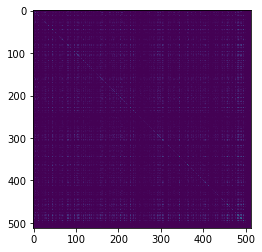

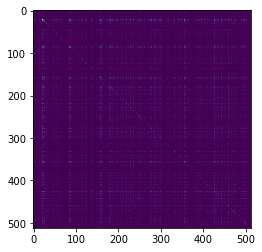

In [5]:
with open(r"learning_output/vgg_style.pickle", "rb") as input_file:
    dict_results = pickle.load(input_file)
    gram_matrices = dict_results["gram_matrices"]
    print(gram_matrices.shape)
    
    import matplotlib.pyplot as plt
    plt.imshow(gram_matrices[0][:, :, 0])
    plt.show()
    plt.imshow(gram_matrices[1000][:, :, 0])
    plt.show()

In [3]:
(X_train, Y_train), (X_test, Y_test) = data_module.get_train_test_salience(gray=True)

[INFO] Starting Complexity Computation
[INFO] Starting Sobel Detection
[INFO] Finished Sobel Detection
[INFO] Finished Complexity Computation
Complexity: 26.09184547680565


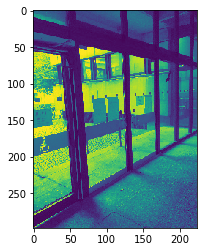

Complexity: 13.443203926620853


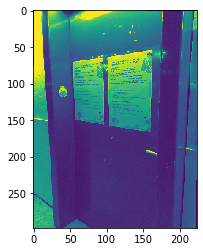

Complexity: 38.11137219838718


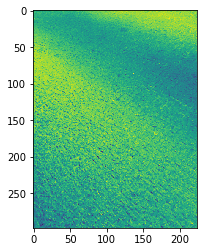

Complexity: 34.18908480672615


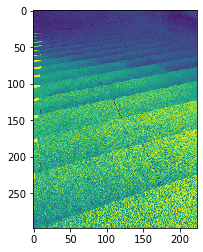

Complexity: 13.605414070240528


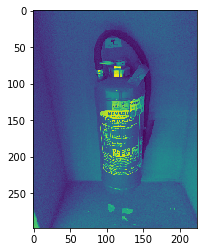

Complexity: 18.152649033853365


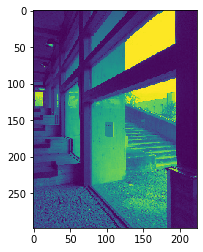

Complexity: 65.34774389657977


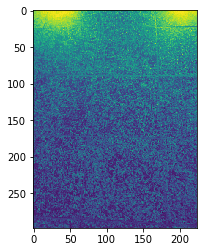

Complexity: 55.32020083370946


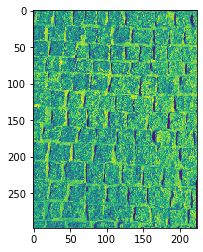

Complexity: 14.178043117981582


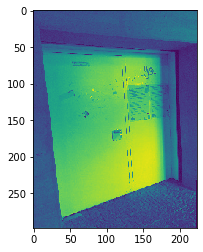

Complexity: 20.7150849903722


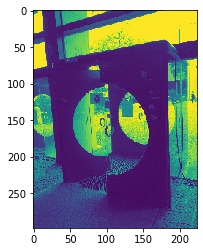

In [5]:
import matplotlib.pyplot as plt

ims = extraction_module.complexity(X_test[:10])

for idx, value in enumerate(ims):
    print("Complexity:", value)
    plt.imshow(X_test[idx][:,:,0])
    plt.show()